In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
df = pd.read_csv(url, header=None)

In [3]:
# Preprocess data
X = df.iloc[:, 1:]
X = X / 15.0
y = df.iloc[:, 0]
y = pd.get_dummies(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Define neural network architecture
mmodel = Sequential()
mmodel.add(Dense(64, input_dim=16, activation='relu'))
mmodel.add(Dense(32, activation='relu'))
mmodel.add(Dense(26, activation='softmax'))

# Compile model
mmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train model
history = mmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluate model
test_loss, test_acc = mmodel.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

Epoch 1/100
438/438 [==============================] - 2s 3ms/step - loss: 2.8379 - accuracy: 0.2375 - val_loss: 2.1731 - val_accuracy: 0.4235
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 1.8432 - accuracy: 0.4896 - val_loss: 1.6230 - val_accuracy: 0.5302
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 1.5091 - accuracy: 0.5797 - val_loss: 1.4253 - val_accuracy: 0.6005
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 1.3642 - accuracy: 0.6181 - val_loss: 1.3383 - val_accuracy: 0.6243
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 1.2734 - accuracy: 0.6433 - val_loss: 1.2381 - val_accuracy: 0.6630
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 1.2078 - accuracy: 0.6685 - val_loss: 1.1824 - val_accuracy: 0.6743
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 1.1546 - accuracy: 0.6837 - val_loss: 1.1233 - val_accuracy: 0.6983

<ipython-input-8-a8714d259c91>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
<ipython-input-8-a8714d259c91>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')


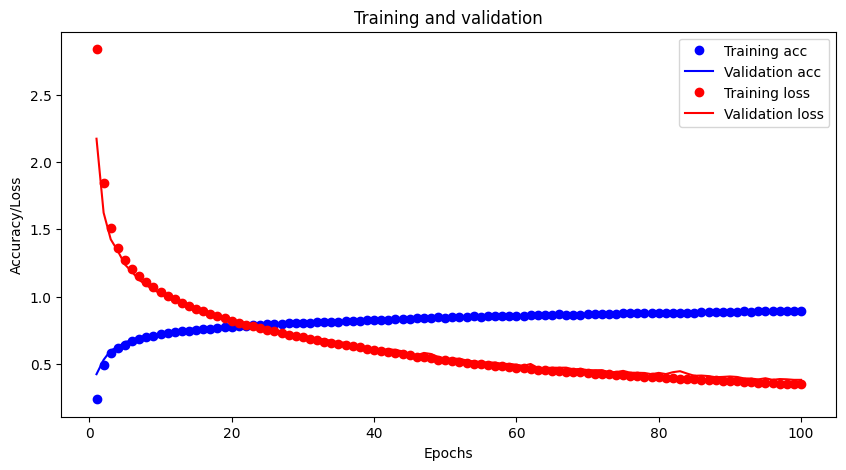

In [8]:
plt.figure(figsize=(10, 5))
# Plot training and validation Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [9]:
# Make predictions on test data
y_pred = mmodel.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

188/188 [==============================] - 0s 1ms/step


In [10]:
# Calculate prediction accuracy
test_acc = np.mean(y_pred == y_true)
print("Test accuracy:", test_acc)

Test accuracy: 0.8815


In [13]:
# Create a confusion matrix
conf_mat = np.zeros((26, 26), dtype = int)
for i in range(len(y_true)):
  conf_mat[y_true[i], y_pred[i]] += 1

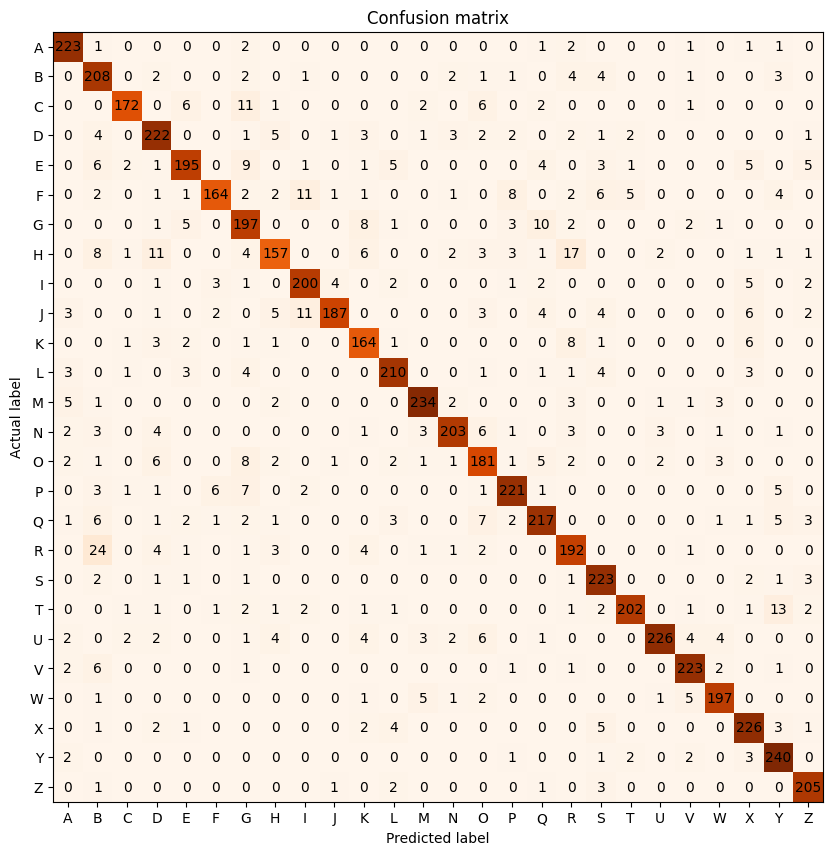

In [14]:
# Visualize prediction accuracy
plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap='Oranges')
plt.xticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.yticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
for i in range(26):
    for j in range(26):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true)*0.05 else 'black')
plt.show()

***

In [15]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [17]:
# Pad the sequences to the same length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [18]:
bmodel = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Conv1D(32, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

In [19]:
bmodel.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc']
)
history = bmodel.fit(
  X_train, y_train,
  epochs=16,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/16
157/157 [==============================] - 6s 33ms/step - loss: 0.6451 - acc: 0.6194 - val_loss: 0.5268 - val_acc: 0.7280
Epoch 2/16
157/157 [==============================] - 5s 30ms/step - loss: 0.4122 - acc: 0.8146 - val_loss: 0.4070 - val_acc: 0.8036
Epoch 3/16
157/157 [==============================] - 6s 38ms/step - loss: 0.3226 - acc: 0.8626 - val_loss: 0.4155 - val_acc: 0.8124
Epoch 4/16
157/157 [==============================] - 5s 30ms/step - loss: 0.2750 - acc: 0.8882 - val_loss: 0.4384 - val_acc: 0.8116
Epoch 5/16
157/157 [==============================] - 7s 44ms/step - loss: 0.2371 - acc: 0.9100 - val_loss: 0.4311 - val_acc: 0.8202
Epoch 6/16
157/157 [==============================] - 5s 31ms/step - loss: 0.2018 - acc: 0.9265 - val_loss: 0.4501 - val_acc: 0.8180
Epoch 7/16
157/157 [==============================] - 5s 32ms/step - loss: 0.1698 - acc: 0.9410 - val_loss: 0.5104 - val_acc: 0.8078
Epoch 8/16
157/157 [==============================] - 6s 36ms/step - 

In [20]:
score = bmodel.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

782/782 [==============================] - 3s 4ms/step - loss: 1.0656 - acc: 0.8023
Test loss: 1.065598964691162
Test accuracy: 0.8022800087928772


<ipython-input-21-9cd991004180>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
<ipython-input-21-9cd991004180>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation Loss', color='red')


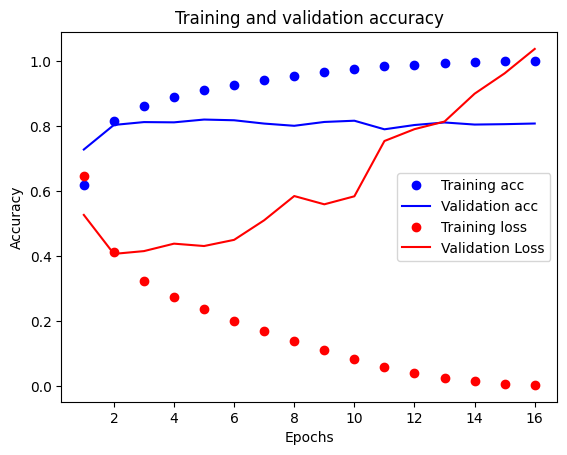

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
# Plot the training and validation loss
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()